<a href="https://colab.research.google.com/github/noushadkhan01/tensorflow/blob/master/classification/bank_customers_calssification_for_exiting_the_bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()

In [2]:
!ls

cleaned_test.csv   kaggle.json	     sample_data
cleaned_train.csv  Machine-Learning  submission_epochs100.csv


In [3]:
!git clone https://github.com/noushadkhan01/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 30 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [4]:
!ls

cleaned_test.csv   kaggle.json	     sample_data	       tensorflow
cleaned_train.csv  Machine-Learning  submission_epochs100.csv


In [5]:
df = pd.read_csv('tensorflow/classification/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## check for null values

In [9]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

**^^as u can see there is no null value**

In [10]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [11]:
np.log1p(df.Age).skew()

0.20336041516983316

## import important dependencies

In [0]:
import tensorflow as tf
from tensorflow import keras

In [13]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [14]:
df = df.iloc[:, 3:]
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [15]:
df = pd.get_dummies(df, drop_first = True)
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [16]:
X = df.drop('Exited', 1)
y = df.Exited
X.shape, y.shape

((10000, 11), (10000,))

## StandardScaler

We need to scale out data before applying to neural network becuase of speed

In [0]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [43]:
columns = X_train.columns
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [41]:
X_train.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7681,641,33,2,146193.6,2,1,1,55796.83,0,0,1


In [42]:
X_test.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:1], X_test[:1]

(array([[-0.09792126, -0.55759842, -1.03635146,  1.13249447,  0.81039385,
          0.64198477,  0.96683535, -0.76862426, -0.56987189, -0.5731713 ,
          0.92295821]]),
 array([[-0.55032881, -0.36597914,  1.0436811 ,  0.89172052, -0.92971564,
          0.64198477,  0.96683535,  1.61245299,  1.75478035, -0.5731713 ,
         -1.08347268]]))

In [47]:
y_train = y_train.values
y_test = y_test.values
y_train[:2], y_test[:2]

(array([1, 0]), array([0, 1]))

# Make ANN

In [0]:
from tensorflow import keras

## import Sequential from keras
**it is required to initialize our neural network model**

### Step 1:- create ann model by sequential

In [49]:
#1 first initialize our keras model by Sequential
model = keras.models.Sequential()
model

### Step 2:- Add dense layer

if a data is linenarly separable then their is no need to add hidden layer or don't even need a neural networks by convention

**Tip:-- ** no. of nodes in hidden layers is the average of no. of nodes in input layers and no. of node in output layer

In [50]:
ninput = 11 #no of independent variables
noutput = 1 #output is either 1 or either 0 so no of hidden layers in output is 1
nhidden = (ninput + noutput) / 2
nhidden

6.0

In [0]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu, input_dim = 11))

In [52]:
model

### add 2nd layer

In [53]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu))
model

### Step 3:- add output layer

**there are two types of activation function for output of categorical varibles **
- 1**softmax**, which is used when dependent varible have more than two categorical variables
- 2 **sigmoid** , which is used when dependent varable have 2 categorical variables

In [0]:
model.add(keras.layers.Dense(units = 1, activation = tf.nn.sigmoid))

In [55]:
model

## Step 4:-- compile the model
apply stochastic gradient descent method

In [56]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model

### Step 5:-- fit the model

batch_size = no. of observation afterwhich u want to update the weights

In [57]:
model.fit(X_train, y_train, batch_size = 10 , epochs = 100, class_weight = 'balance')

Epoch 1/100
7000/7000 [==============================] - 1s 172us/step - loss: 0.5721 - acc: 0.7309
Epoch 2/100
7000/7000 [==============================] - 1s 119us/step - loss: 0.4604 - acc: 0.8000
Epoch 3/100
7000/7000 [==============================] - 1s 116us/step - loss: 0.4365 - acc: 0.8054
Epoch 4/100
7000/7000 [==============================] - 1s 119us/step - loss: 0.4264 - acc: 0.8086
Epoch 5/100
7000/7000 [==============================] - 1s 118us/step - loss: 0.4194 - acc: 0.8134
Epoch 6/100
7000/7000 [==============================] - 1s 117us/step - loss: 0.4105 - acc: 0.8177
Epoch 7/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3994 - acc: 0.8259
Epoch 8/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3860 - acc: 0.8327
Epoch 9/100
7000/7000 [==============================] - 1s 115us/step - loss: 0.3759 - acc: 0.8393
Epoch 10/100
7000/7000 [==============================] - 1s 115us/step - loss: 0.3688 - acc: 0.8426

### Step 7:- make predictions

In [58]:
y_pred = model.predict(X_test)
y_pred[:2]

array([[0.25947544],
       [0.33895501]], dtype=float32)

In [59]:
y_pred.max()

0.99999976

In [60]:
y_pred.min()

0.0019692387

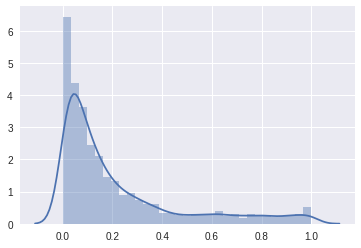

In [61]:
sns.distplot(y_pred)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [63]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [0 0 0] 

confusion matrix is

 [[2265  114]
 [ 311  310]] 


Precision score is :- 0.7311320754716981
Recall score is :- 0.499194847020934
Classification report is 

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2379
          1       0.73      0.50      0.59       621

avg / total       0.85      0.86      0.85      3000



Homework Instruction



Use our ANN model to predict if the customer with the following informations will leave the bank: 

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $50000


In [44]:
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [64]:
user = np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]])
user

array([[  600,    40,     3, 60000,     2,     1,     1, 50000,     0,
            0,     1]])

**We need to scale that user becuase our model has been trained on scaled data**

In [65]:
user = sc.transform(user)
user

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.51948284,  0.11306906, -0.68967937, -0.24256538,  0.81039385,
         0.64198477,  0.96683535, -0.86933284, -0.56987189, -0.5731713 ,
         0.92295821]])

In [66]:
user_result = model.predict(user)
user_result

array([[0.03466043]], dtype=float32)

In [67]:
user_result = model.predict_classes(user)
user_result

array([[0]], dtype=int32)

**^^as u can see this user will not leave the bank**